## Network building

This notebook provides the steps to build a network starting from a list of genes, and using the default functionalities of Omniflow.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op

CPU times: user 3.67 s, sys: 1.55 s, total: 5.22 s
Wall time: 4.2 s


In [2]:
date='2_June_2024_attempt'

### 1. Define the list of genes of interest

**Calreticulin**

In [9]:
genes=["TOP2A","TDP1","PNKP","TDP2","PARP1","XRCC1","LIG3","ATM","ATR"]

In [4]:
tmp=op.interactions.AllInteractions.get("omnipath")

In [5]:
tmp[tmp["target"]=="P27797"]

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,n_sources,n_primary_sources,n_references,references_stripped
666,COMPLEX:P23511_P25208_Q13952,P27797,True,True,False,True,True,False,2,SPIKE:16721047;SPIKE_LC:16721047,SPIKE;SPIKE_LC,post_translational,2,1,1,16721047
8346,P61769,P27797,True,False,False,False,False,False,3,HPRD:8769474;Macrophage:10618487;Macrophage:95...,HPRD;Macrophage,post_translational,2,2,3,10618487;8769474;9597133
8355,Q03518,P27797,True,False,False,False,False,False,3,Macrophage:10618487;SPIKE_LC:17145710,Macrophage;SPIKE_LC,post_translational,2,1,2,10618487;17145710
8359,Q03519,P27797,True,False,False,False,False,False,2,Macrophage:10618487,Macrophage,post_translational,1,1,1,10618487
8362,O15533,P27797,True,False,False,False,False,False,4,BioGRID:8769474;HPRD:8769474;Macrophage:10618487,BioGRID;HPRD;Macrophage,post_translational,3,3,2,10618487;8769474
8369,Q15084,P27797,True,False,False,False,False,False,1,Macrophage:10618487,Macrophage,post_translational,1,1,1,10618487
69868,P16473,P27797,True,False,False,False,False,False,4,Cellinker:12383251;HPRD:12383251;NetPath:12383...,Cellinker;HPRD;NetPath;SPIKE_LC,post_translational,4,3,2,12383251;16189514
70898,P48039,P27797,True,False,False,False,False,False,4,Cellinker:17215244;HPRD:17215244;IntAct:282984...,Cellinker;HPRD;IntAct;SPIKE_LC,post_translational,4,3,3,17145710;17215244;28298427
71986,P11226,P27797,True,False,False,False,False,False,2,Cellinker:11560994;HPRD:8062452,Cellinker;HPRD,post_translational,2,2,2,11560994;8062452


In [6]:
len(genes)

9

In [10]:
new_net1 = Network(genes)

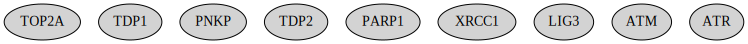

In [11]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render(output_file=date)

In [12]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

CPU times: user 637 ms, sys: 553 µs, total: 637 ms
Wall time: 637 ms


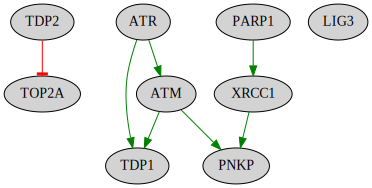

In [13]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render(output_file=date)

In [14]:
%%time
new_net1.complete_connection(maxlen=6, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True, consensus=True)

CPU times: user 5min 15s, sys: 60.8 ms, total: 5min 15s
Wall time: 5min 15s


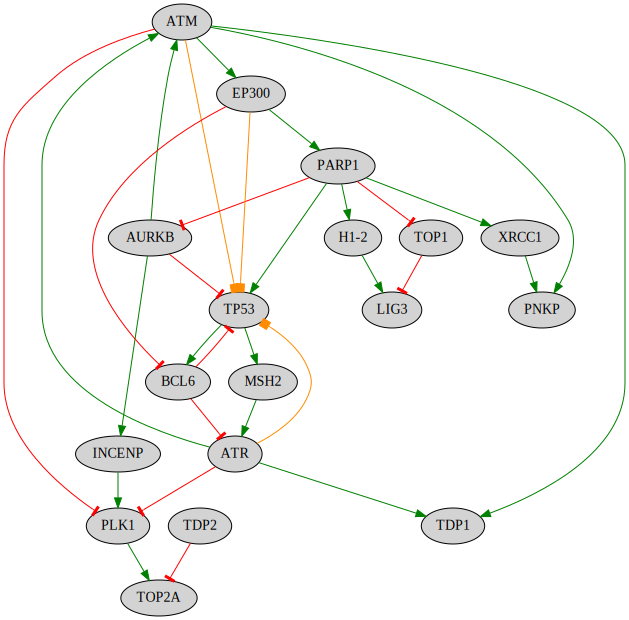

In [15]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render(output_file=date)

In [16]:
from neko._outputs.exports import Exports

In [17]:
net=Exports(new_net1)
net.export_bnet("Cross_link_standard.bnet")

Bimodal interactions:
ATM -> TP53
Reference: ACSN:15024084;ACSN:15140942;ACSN:18855897;ACSN:20506250;ACSN:21614932;ACSN:9733514;ACSN:9733515;ACSN:9843217;BioGRID:12645530;BioGRID:14744854;BioGRID:15632067;BioGRID:23525106;BioGRID:23907539;BioGRID:24469230;BioGRID:27559048;BioGRID:28654064;HPRD-phos:10673501;HPRD-phos:11551930;HPRD-phos:11709713;HPRD-phos:11780126;HPRD-phos:11875057;HPRD-phos:9765199;HPRD:10673501;HPRD:11551930;HPRD:11709713;HPRD:11875057;HPRD:16858402;HPRD:17157788;HPRD:9765199;HPRD:9843217;InnateDB:10608806;KEA:10446957;KEA:10673501;KEA:10801407;KEA:10864201;KEA:11483158;KEA:11551930;KEA:11709713;KEA:11780126;KEA:11875057;KEA:12064478;KEA:12091386;KEA:12111733;KEA:12242661;KEA:12548019;KEA:15159397;KEA:15254178;KEA:15489221;KEA:16552184;KEA:16729035;KEA:16906133;KEA:17570479;KEA:9372954;KEA:9765199;KEA:9843217;Macrophage:9407038;PhosphoSite:10608806;PhosphoSite:10611322;PhosphoSite:10656682;PhosphoSite:10713094;PhosphoSite:10723129;PhosphoSite:10744722;PhosphoSite:109

In [18]:
new_net1.edges.to_csv(date+'.csv')

In [3]:
new_net2=Network(sif_file="SHH_specific_network.sif")

In [11]:
df = new_net2.convert_edgelist_into_genesymbol()

In [21]:
new_net2.edges.to_csv(date+'_genesymbols.csv')

In [5]:
from yfiles_jupyter_graphs import GraphWidget
from typing import Dict

In [6]:
w = GraphWidget()

In [7]:
# filling w with nodes
objects = []
for idx, item in new_net2.nodes.iterrows():
    obj = {
        "id" : new_net2.nodes["Genesymbol"].loc[idx],
        "properties" : {"label": new_net2.nodes["Genesymbol"].loc[idx]},
        "color":"#ffffff",
        "styles":{"backgroundColor":"#ffffff"}
        }
    objects.append(obj)
w.nodes=objects

In [12]:
objects= []
for index, row in df.iterrows():
    obj={
    "id":df["Effect"].loc[index],
    "start" : df["source"].loc[index],
    "end" : df["target"].loc[index],
    "properties":{"references":df["References"].loc[index]}}
    objects.append(obj)
w.edges=objects

In [14]:
def custom_edge_color_mapping(edge: Dict):
    """let the edge be purple if the starting node has an even index"""
    if edge['id']  == "inhibition":
        color="#ff0066"
    elif edge['id']  == "stimulation":
        color="#00cc00"
    elif edge['id']  == "bimodal":
        color="#0096FF"
    elif edge['id']  == "undefined":
        color="#d834eb"
    return color
w.set_edge_color_mapping(custom_edge_color_mapping)


def custom_label_styles_mapping(node: Dict):
    """let the label be the negated purple big index"""
    return {
        'backgroundColor': '#ffffff', 
        'color': '#ffffff', 
        'shape':'circle',
        "fontSize": 200
    }
w.set_node_styles_mapping(custom_label_styles_mapping)

In [15]:
w.directed=True
w.graph_layout='hierarchic'
w.show()

GraphWidget(layout=Layout(height='800px', width='100%'))

In [ ]:
new_net1.convert_edgelist_into_genesymbol()
new_net1.edges

In [ ]:
new_net1.edges.to_csv("21st_May_2024.csv")

In [ ]:
from neko._outputs.exports import Exports

In [ ]:
new_net1.edges

In [ ]:
Exports.export_bnet(new_net1,"21st_May_2024_AC.bnet")

In [ ]:
Exports.export_bnet(